In [23]:
import matplotlib

matplotlib.rcParams["mathtext.fontset"] = "custom"
matplotlib.rcParams["mathtext.rm"] = "Bitstream Vera Sans"
matplotlib.rcParams["mathtext.it"] = "Bitstream Vera Sans:italic"
matplotlib.rcParams["mathtext.bf"] = "Bitstream Vera Sans:bold"
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"

import matplotlib.pyplot as plt
import json
import os

In [24]:
def load_times(files: list[str]) -> dict[str, tuple[list[float], list[float]]]:
    loaded_times = {}
    for filename in files:
        with open(filename, "r") as f:
            results_dict = json.load(f)
            loaded_times[results_dict["experiment_config"]["name"]] = results_dict

    return loaded_times

In [56]:
def show_gen_times(times):
    labels = ["Eager", "Compiled Decode", "Compiled Prefill+Decode"]
    for (key, value), label in zip(times.items(), labels):
        gen_time_list = value["results"]["gen_time_list"]
        a = plt.plot(
            range(len(gen_time_list[2:])),
            gen_time_list[2:],
            label=label,
            linewidth=1,
        )
        plt.axhline(
            sum(gen_time_list[2:]) / len(gen_time_list[2:]),
            color=a[0].get_color(),
            linestyle="--",
            linewidth=1,
            zorder=2,
        )
    plt.grid(alpha=0.6, zorder=1)
    plt.xlabel("Token number", fontsize=14)
    plt.ylabel("Generation time (s)", fontsize=14)
    plt.title(
        f"Tokens generation time during decoding\nDecode: {key.split("_")[1][:-1]}, batch size: {key.split("_")[2][:-1]}",
        fontsize=18,
    )
    plt.legend(fontsize=12)
    plt.show()

In [61]:
import matplotlib.pyplot as plt


def show_wall_times(times):
    # fig = plt.figure(figsize=(12, 8))
    labels = ["Eager", "Compiled Decode", "Compiled Prefill+Decode"]
    for (key, value), label in zip(times.items(), labels):

        (time_list, start_prefill, end_prefill) = (
            value["results"]["time_list"],
            value["results"]["start_prefill"],
            value["results"]["end_prefill"],
        )
        time_list = [0, end_prefill - start_prefill] + [
            x - start_prefill for x in time_list
        ]
        obj = plt.plot(
            time_list,
            range(len(time_list)),
            "-o",
            markersize=3,
            linewidth=1,
            label=label,
        )
        plt.axvline(
            end_prefill - start_prefill,
            linestyle="--",
            # label=f"end prefill {key}",
            color=obj[0].get_color(),
            linewidth=1,
        )
        plt.axvline(
            time_list[2],
            linestyle=":",
            color=obj[0].get_color(),
            # label=f"first decode {key}",
            linewidth=1,
        )
    plt.grid(alpha=0.6, zorder=1)
    plt.xlabel("Wall time (s)", fontsize=14)
    plt.ylabel("Token Number", fontsize=14)
    plt.title(
        f"Prefill+decode wall time\nDecode: {key.split("_")[1][:-1]}, batch size: {key.split("_")[2][:-1]}",
        fontsize=18,
    )
    plt.legend(fontsize=12)
    plt.show()

## Batch size 1

```
---Run decode_200t_1p_eager---
Warmup started
The 'batch_size' attribute of StaticCache is deprecated and will be removed in v4.49. Use the more precisely named 'self.max_batch_size' attribute instead.
Warmup done
Prefill latency: 0.2924 s
Decode latency (first): 0.1826 s
Decode latency (rest): 37.5889 s
Decode latency per token (rest): 0.1879 s
Full latency: 38.0638 s

---Run decode_200t_1p_compile_model_fn---
Warmup started
Warmup done
Prefill latency: 0.3080 s
Decode latency (first): 7.8843 s
Decode latency (rest): 35.4438 s
Decode latency per token (rest): 0.1772 s
Full latency: 43.6361 s

---Run prefill+decode_200t_1p_compile_model_fn---
Warmup started
Warmup done
Prefill latency: 8.5560 s
Decode latency (first): 7.4053 s
Decode latency (rest): 35.7163 s
Decode latency per token (rest): 0.1786 s
Full latency: 51.6776 s
```

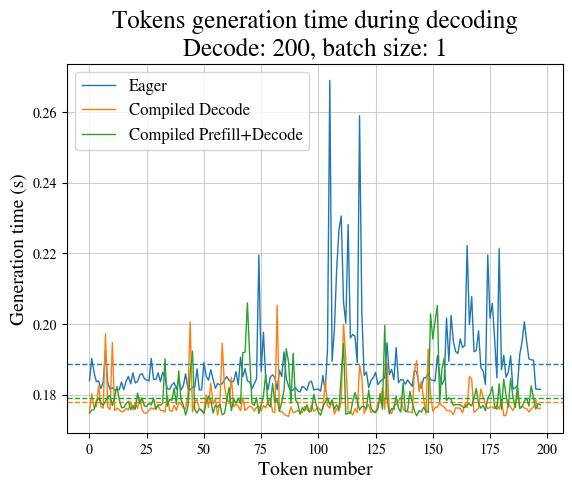

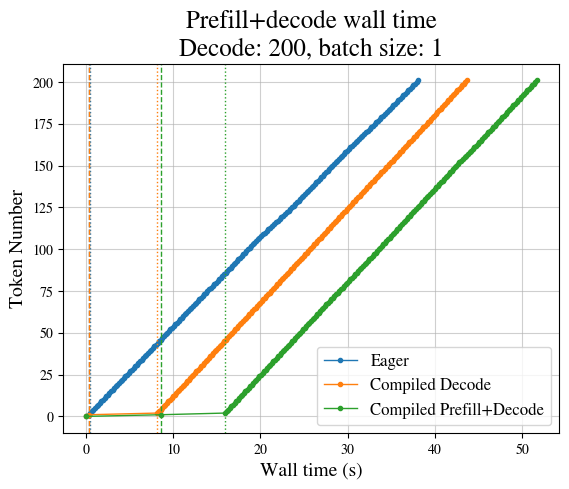

In [62]:
files = [
    "./results_final/decode_200t_1p_eager.json",
    "./results_final/decode_200t_1p_compile_model_fn.json",
    "./results_final/prefill+decode_200t_1p_compile_model_fn.json",
]
times = load_times(files)
show_gen_times(times)
show_wall_times(times)

## Batch size 4

```
---Run decode_200t_4p_eager---
Warmup started
Warmup done
Prefill latency: 0.3852 s
Decode latency (first): 0.3484 s
Decode latency (rest): 72.4884 s
Decode latency per token (rest): 0.3624 s
Full latency: 73.2220 s

---Run decode_200t_4p_compile_model_fn---
Warmup started
Warmup done
Prefill latency: 0.3456 s
Decode latency (first): 8.1871 s
Decode latency (rest): 74.8372 s
Decode latency per token (rest): 0.3742 s
Full latency: 83.3699 s

---Run prefill+decode_200t_4p_compile_model_fn---
Warmup started
Warmup done
Prefill latency: 8.3908 s
Decode latency (first): 7.7221 s
Decode latency (rest): 71.5094 s
Decode latency per token (rest): 0.3575 s
Full latency: 87.6224 s
```

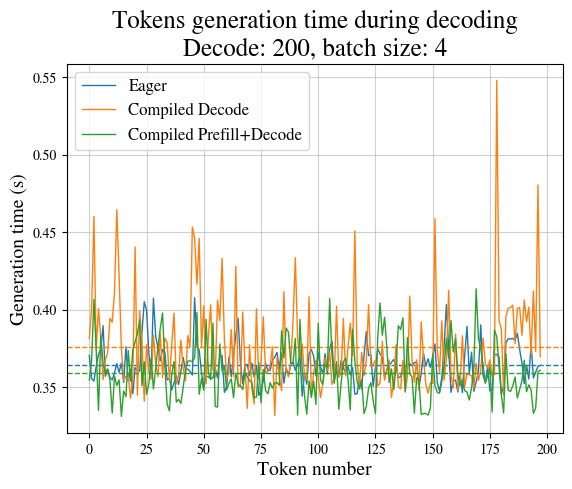

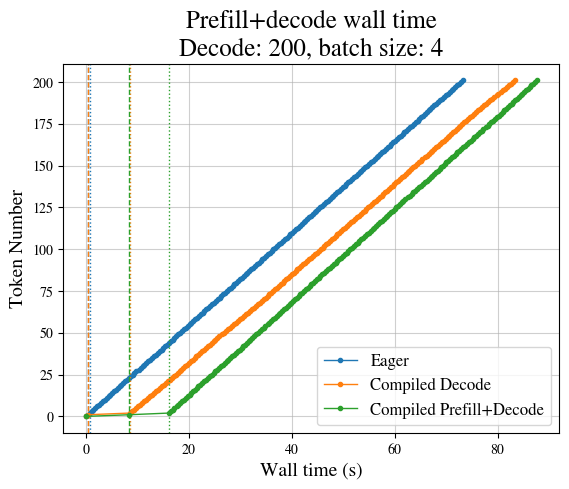

In [63]:
files = [
    "./results_final/decode_200t_4p_eager.json",
    "./results_final/decode_200t_4p_compile_model_fn.json",
    "./results_final/prefill+decode_200t_4p_compile_model_fn.json",
]
times = load_times(files)
show_gen_times(times)
show_wall_times(times)

## Batch size 32

```
---Run decode_200t_32p_eager---
Warmup started
Warmup done
Prefill latency: 1.1185 s
Decode latency (first): 0.3443 s
Decode latency (rest): 68.6846 s
Decode latency per token (rest): 0.3434 s
Full latency: 70.1473 s

---Run decode_200t_32p_compile_model_fn---
Warmup started
Warmup done
Prefill latency: 1.1087 s
Decode latency (first): 7.8175 s
Decode latency (rest): 58.3888 s
Decode latency per token (rest): 0.2919 s
Full latency: 67.3151 s

---Run prefill+decode_200t_32p_compile_model_fn---
Warmup started
Warmup done
Prefill latency: 9.5774 s
Decode latency (first): 8.2216 s
Decode latency (rest): 59.5633 s
Decode latency per token (rest): 0.2978 s
Full latency: 77.3623 s
```

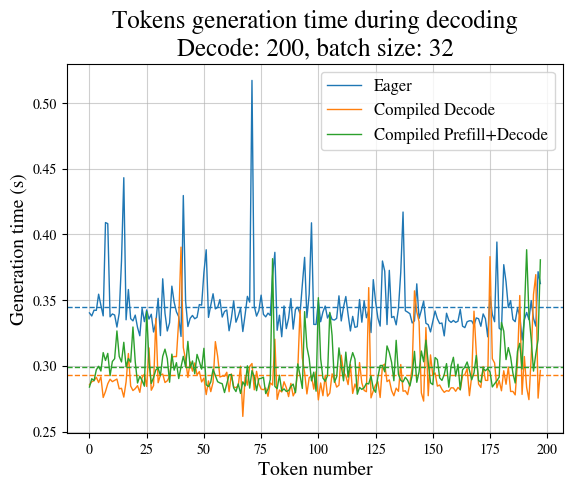

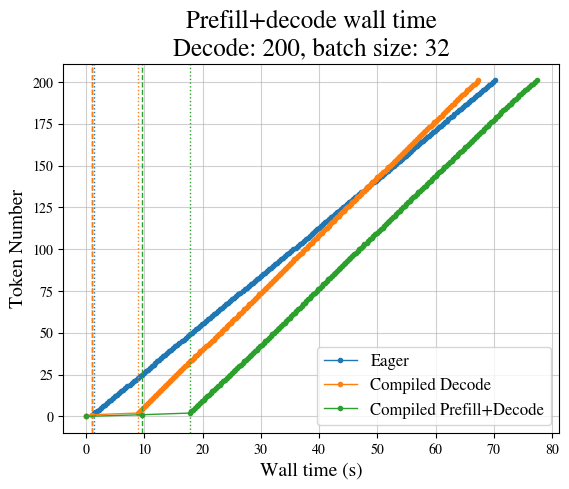

In [64]:
files = [
    "./results_final/decode_200t_32p_eager.json",
    "./results_final/decode_200t_32p_compile_model_fn.json",
    "./results_final/prefill+decode_200t_32p_compile_model_fn.json",
]
times = load_times(files)
show_gen_times(times)
show_wall_times(times)

## Batch size 128

```
---Run decode_200t_128p_eager---
Warmup started
The 'batch_size' attribute of StaticCache is deprecated and will be removed in v4.49. Use the more precisely named 'self.max_batch_size' attribute instead.
Warmup done
Prefill latency: 4.7866 s
Decode latency (first): 0.9983 s
Decode latency (rest): 157.7394 s
Decode latency per token (rest): 0.7887 s
Full latency: 163.5243 s

---Run decode_200t_128p_compile_model_fn---
Warmup started
Warmup done
Prefill latency: 5.0644 s
Decode latency (first): 10.3259 s
Decode latency (rest): 115.1219 s
Decode latency per token (rest): 0.5756 s
Full latency: 130.5122 s

---Run prefill+decode_200t_128p_compile_model_fn---
Warmup started
Warmup done
Prefill latency: 12.7813 s
Decode latency (first): 8.4173 s
Decode latency (rest): 113.6916 s
Decode latency per token (rest): 0.5685 s
Full latency: 134.8903 s
```

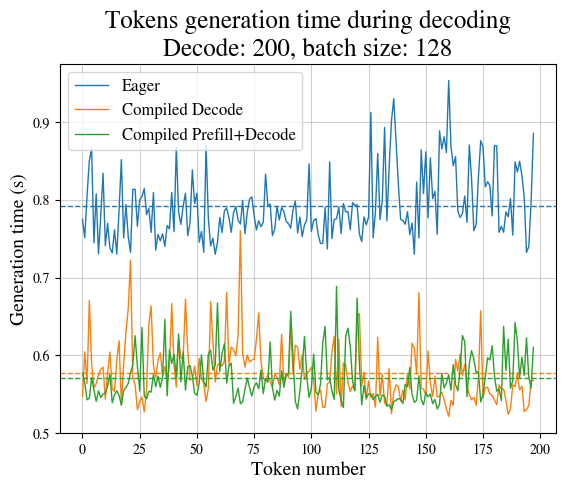

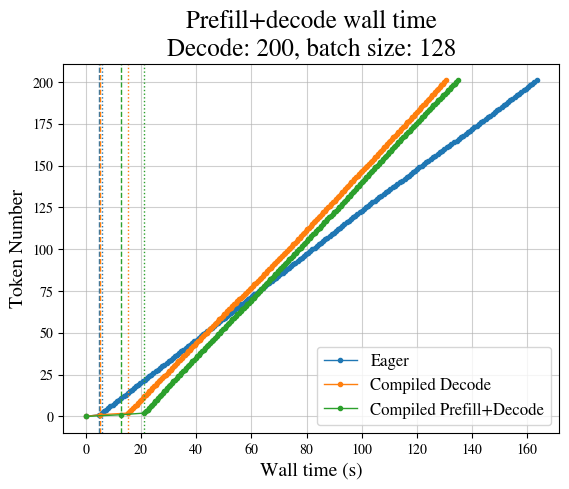

In [65]:
files = [
    "./results_final/decode_200t_128p_eager.json",
    "./results_final/decode_200t_128p_compile_model_fn.json",
    "./results_final/prefill+decode_200t_128p_compile_model_fn.json",
]
times = load_times(files)
show_gen_times(times)
show_wall_times(times)

## Batch size 256

```
---Run decode_200t_256p_eager---
Warmup started
Warmup done
Prefill latency: 11.1284 s
Decode latency (first): 1.4162 s
Decode latency (rest): 269.4427 s
Decode latency per token (rest): 1.3472 s
Full latency: 281.9873 s

---Run decode_200t_256p_compile_model_fn---
Warmup started
Warmup done
Prefill latency: 9.7038 s
Decode latency (first): 8.7548 s
Decode latency (rest): 177.9857 s
Decode latency per token (rest): 0.8899 s
Full latency: 196.4443 s

---Run prefill+decode_200t_256p_compile_model_fn---
Warmup started
Warmup done
Prefill latency: 16.8197 s
Decode latency (first): 8.4992 s
Decode latency (rest): 199.7253 s
Decode latency per token (rest): 0.9986 s
Full latency: 225.0442 s
```

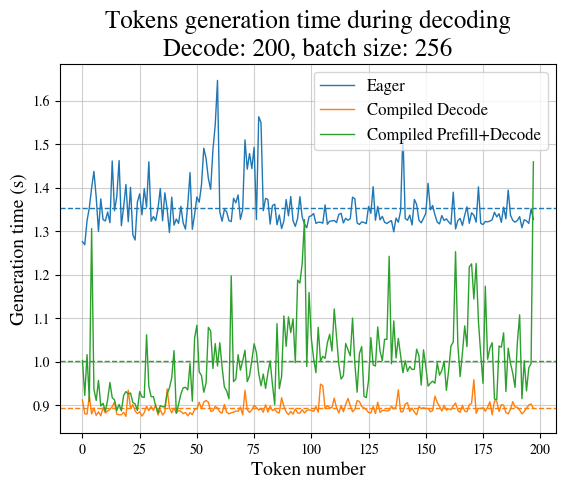

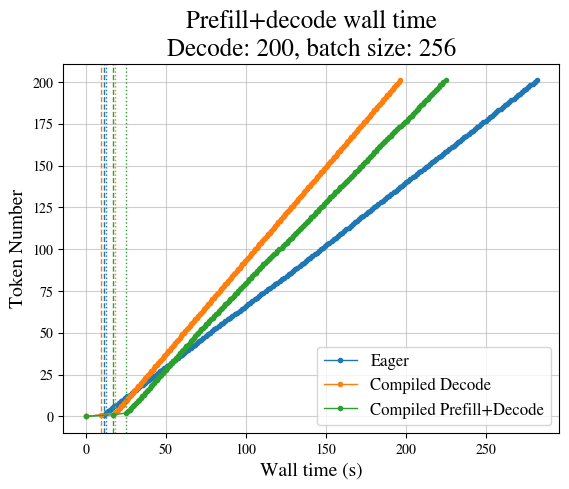

In [66]:
files = [
    "./results_final/decode_200t_256p_eager.json",
    "./results_final/decode_200t_256p_compile_model_fn.json",
    "./results_final/prefill+decode_200t_256p_compile_model_fn.json",
]
times = load_times(files)
show_gen_times(times)
show_wall_times(times)

## Multiple generations

In [67]:
eager = json.load(open("eager.json"))
compiled_non_dynamic = json.load(open("compile_non_dynamic.json"))
compiled_dynamic = json.load(open("compile_dynamic.json"))

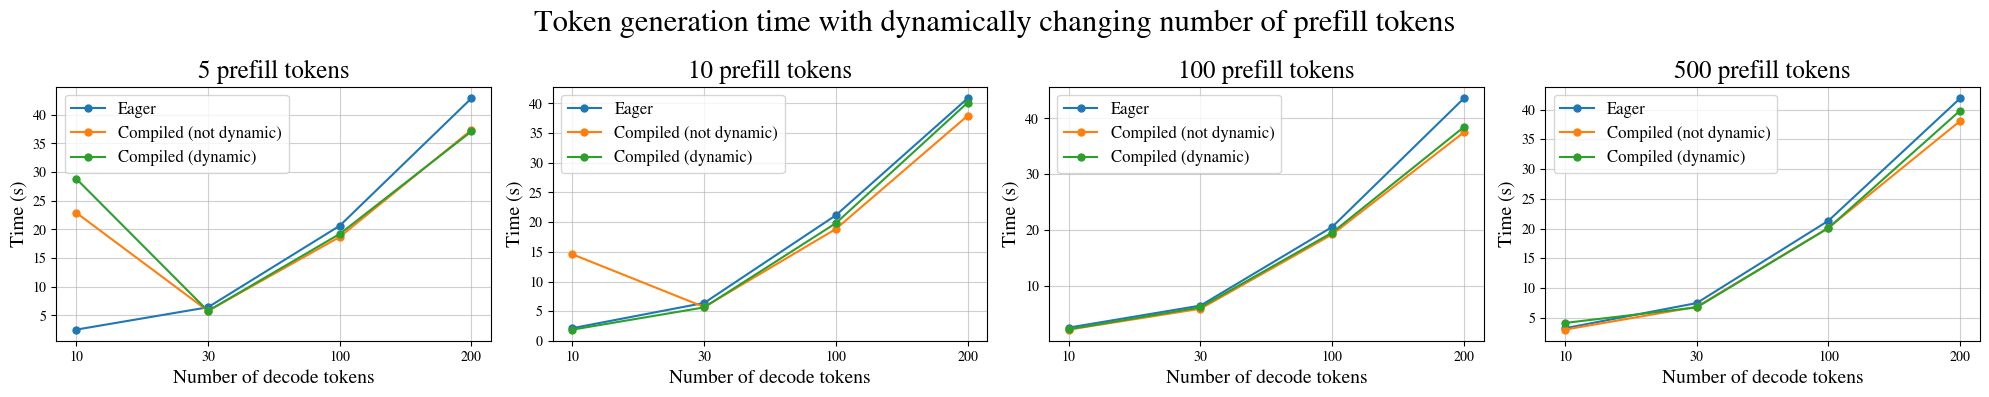

In [68]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))


for name, data in [
    ("Eager", eager),
    ("Compiled (not dynamic)", compiled_non_dynamic),
    ("Compiled (dynamic)", compiled_dynamic),
]:
    prefill_sizes = list(data.keys())
    key = "5"
    ax[0].plot(data[key].keys(), data[key].values(), "-o", markersize=5, label=name)
ax[0].grid(alpha=0.6, zorder=1)
ax[0].legend(fontsize=12)
ax[0].set_ylabel("Time (s)", fontsize=14)
ax[0].set_xlabel("Number of decode tokens", fontsize=14)
ax[0].set_title("5 prefill tokens", fontsize=18)

for name, data in [
    ("Eager", eager),
    ("Compiled (not dynamic)", compiled_non_dynamic),
    ("Compiled (dynamic)", compiled_dynamic),
]:
    prefill_sizes = list(data.keys())
    key = "10"
    ax[1].plot(data[key].keys(), data[key].values(), "-o", markersize=5, label=name)
ax[1].grid(alpha=0.6, zorder=1)
ax[1].legend(fontsize=12)
ax[1].set_ylabel("Time (s)", fontsize=14)
ax[1].set_xlabel("Number of decode tokens", fontsize=14)
ax[1].set_title("10 prefill tokens", fontsize=18)

for name, data in [
    ("Eager", eager),
    ("Compiled (not dynamic)", compiled_non_dynamic),
    ("Compiled (dynamic)", compiled_dynamic),
]:
    prefill_sizes = list(data.keys())
    key = "100"
    ax[2].plot(data[key].keys(), data[key].values(), "-o", markersize=5, label=name)
ax[2].grid(alpha=0.6, zorder=1)
ax[2].legend(fontsize=12)
ax[2].set_ylabel("Time (s)", fontsize=14)
ax[2].set_xlabel("Number of decode tokens", fontsize=14)
ax[2].set_title("100 prefill tokens", fontsize=18)

for name, data in [
    ("Eager", eager),
    ("Compiled (not dynamic)", compiled_non_dynamic),
    ("Compiled (dynamic)", compiled_dynamic),
]:
    prefill_sizes = list(data.keys())
    key = "500"
    ax[3].plot(data[key].keys(), data[key].values(), "-o", markersize=5, label=name)
ax[3].grid(alpha=0.6, zorder=1)
ax[3].legend(fontsize=12)
ax[3].set_ylabel("Time (s)", fontsize=14)
ax[3].set_xlabel("Number of decode tokens", fontsize=14)
ax[3].set_title("500 prefill tokens", fontsize=18)
plt.suptitle(
    "Token generation time with dynamically changing number of prefill tokens",
    fontsize=22,
)
plt.tight_layout()